### **Dataset Info.**

This project focuses on Twitter Sentiment Analysis using Natural Language Processing (NLP) techniques. It aims to classify tweets as positive, negative, or neutral by preprocessing text data, extracting features, and applying a machine learning model for sentiment classification.







### **Import Modules**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

* pandas as pd → Used for data manipulation and handling tabular data (CSV files).
* numpy as np → Provides support for mathematical computations and arrays.
* matplotlib.pyplot as plt → Used for visualizing data through graphs and plots.
* seaborn as sns → A higher-level data visualization library based on Matplotlib for better aesthetics.
* re (Regular Expressions) → Used for text preprocessing, such as removing special characters, URLs, and mentions in tweets.
* string → Provides common string operations (e.g., removing punctuation).
* nltk (Natural Language Toolkit) → A library for natural language processing (NLP) tasks such as tokenization and stemming.
* warnings → Used to handle and suppress warning messages to clean up the output.



### **Loading the Dataset**

In [ ]:
df=pd.read_csv('test_tweets.csv')
df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


The dataset is loaded using pandas for further processing.

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


* pandas.core.frame.DataFrame → This confirms that the dataset is a Pandas DataFrame.
* Number of Entries: 17197 → The dataset contains 17,197 rows (tweets).
* Number of Columns: 2 → The dataset has two columns.

### **Preprocessing the Dataset**

In [ ]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt) # Finds all occurrences of the given pattern in the text.
    for word in r:
        input_txt=re.sub(word,"",input_txt) # Replace each match with an empty string
    return input_txt # Return cleaned text


In [ ]:
# remove twitter handles like (@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

* np.vectorize(remove_pattern) → Applies the function efficiently to every tweet in the dataset.
*Pattern @[\w]*:
* @ → Matches the @ symbol (Twitter handles start with @).
* [\w]* → Matches any alphanumeric characters and underscores (_) after @ (e.g., @user123).
* Result: The clean_tweet column will now contain tweets without Twitter handles (e.g., @john Hello! → Hello!).

In [ ]:
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


The command df.head() displays the first five rows of the dataset.

In [ ]:
# remove special characters,numbers and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


This code removes special characters, numbers, and punctuations from the clean_tweet.

1. df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
2. [^a-zA-Z#] → Matches everything except letters(a-z, A-Z) and hashtag(#).
3. " " → Replaces matched characters with a space(to preserve word separation).
4. This removes numbers, special characters, and punctuation(e.g., 123, !, ?, ., @).



In [ ]:
# remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone #birdsâ #...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your #acne!! #altwaystoheal #he...
3,31966,is the hp and the cursed child book up for res...,"cursed child book reservations already? yes, w..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","#bihday amazing, hilarious #nephew ahmir! uncl..."


* df['clean_tweet'].apply(lambda x: ...) → Applies a function to each tweet in the clean_tweet column.
* x.split() → Splits each tweet into a list of words.
* List comprehension [w for w in x.split() if len(w) > 3]: Keeps only words where length > 3.
* " ".join([...]) → Joins the filtered words back into a cleaned tweet.

In [ ]:
# individuals words considered as tokens
tokenized_tweet=df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

,clean_tweet
0,"[#studiolife, #aislife, #requires, #passion, #..."
1,"[#white, #supremacists, want, everyone, #birds..."
2,"[safe, ways, heal, your, #acne!!, #altwaystohe..."
3,"[cursed, child, book, reservations, already?, ..."
4,"[#bihday, amazing,, hilarious, #nephew, ahmir!..."


* df['clean_tweet'].apply(lambda x: x.split()): Splits each tweet into a list of words (tokens).
* Each word in a tweet is treated as a separate token.

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[#studiolif, #aislif, #requir, #passion, #dedi..."
1,"[#white, #supremacist, want, everyon, #birdsâ..."
2,"[safe, way, heal, your, #acne!!, #altwaystoh, ..."
3,"[curs, child, book, reserv, already?, yes,, wh..."
4,"[#bihday, amazing,, hilari, #nephew, ahmir!, u..."


* PorterStemmer() → A stemming algorithm that reduces words to their root form.
* apply(lambda sentence: [stemmer.stem(word) for word in sentence]):
Iterates through each tweet (which is already tokenized as a list of words).
* Applies stemming to each word.
* Returns the stemmed words as a list.

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

df['clean_tweet']=tokenized_tweet
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacist want everyon #birdsâ #mo...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal your #acne!! #altwaystoh #health...
3,31966,is the hp and the cursed child book up for res...,"curs child book reserv already? yes, where? wh..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","#bihday amazing, hilari #nephew ahmir! uncl da..."


* Iterates through each tweet (for i in range(len(tokenized_tweet))).
* Joins the list of words into a single string using " ".join(tokenized_tweet[i]).
* Stores the cleaned text back in the DataFrame under df['clean_tweet'].

### **Exploratory Data Analysis**

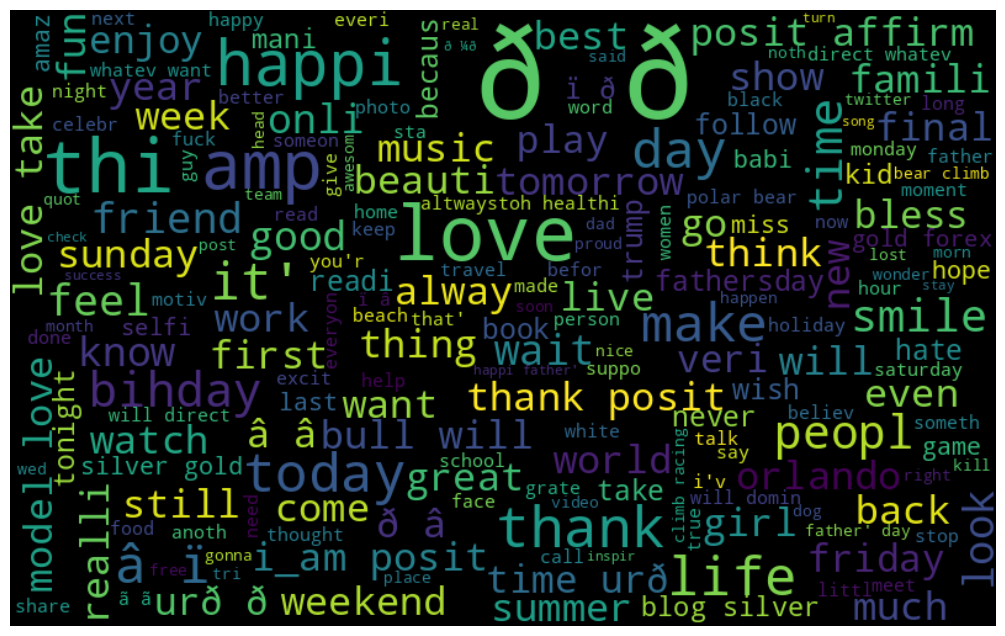

In [ ]:
# visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


* Concatenates all tweets into a single string (all_words).
* Generates a WordCloud:
  * width=800, height=500 → Sets image dimensions.
  * random_state=42 → Ensures reproducibility.
  * max_font_size=100 → Limits the maximum font size.
  * .generate(all_words) → Processes the text and creates a word frequency visualization.
* Displays the WordCloud:
  * plt.imshow(wordcloud, interpolation='bilinear') → Renders the WordCloud.
  * plt.axis('off') → Hides x and y axes for a cleaner look.

### **Perform sentiment analysis(positive ans negative sentence)**


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["clean_tweet"].apply(get_sentiment)

# Show sentiment results
print(df[["clean_tweet", "Sentiment"]].head())


                                         clean_tweet Sentiment
0  #studiolif #aislif #requir #passion #dedic #wi...   Neutral
1  #white #supremacist want everyon #birdsâ #mo...   Neutral
2  safe way heal your #acne!! #altwaystoh #health...  Positive
3  curs child book reserv already? yes, where? wh...   Neutral
4  #bihday amazing, hilari #nephew ahmir! uncl da...  Positive


* Imports TextBlob, a simple NLP library for sentiment analysis.
* Defines a function get_sentiment(text):
  * Uses TextBlob(text).sentiment.polarity to calculate the polarity score:
   * > 0: Positive Sentiment
   * < 0: Negative Sentiment
   * = 0: Neutral Sentiment
* Applies the function to the "clean_tweet" column using .apply(), storing results in a new "Sentiment" column.
* Displays the first few rows of df with "clean_tweet" and "Sentiment".


### **Extract Positive & Negative Tweets**

In [ ]:
# Filter positive and negative tweets
positive_tweets = df[df["Sentiment"] == "Positive"]
negative_tweets = df[df["Sentiment"] == "Negative"]

# Display some positive tweets
print("Positive Tweets:\n", positive_tweets["clean_tweet"].head())

# Display some negative tweets
print("Negative Tweets:\n", negative_tweets["clean_tweet"].head())

Positive Tweets:
 2     safe way heal your #acne!! #altwaystoh #health...
4     #bihday amazing, hilari #nephew ahmir! uncl da...
8     will never understand left when young.... #dee...
10    1000dayswast narcosi infinit ep.. make aware.....
11        world' greatest spo event #lemans24 #teamaudi
Name: clean_tweet, dtype: object
Negative Tweets:
 12                half through websit #allgoingwel veri
14    i'll stand behind thi #guncontrolpleas #sensel...
23               never been thi down myself entir life.
26                     chick get fuck hottest nake ladi
30    i'll #never #120 #again #i'm #thick #women #bl...
Name: clean_tweet, dtype: object


**Filters positive tweets:**

df[df["Sentiment"] == "Positive"] → Selects rows where "Sentiment" is Positive.
Stores the result in positive_tweets.

**Filters negative tweets:**

df[df["Sentiment"] == "Negative"] → Selects rows where "Sentiment" is Negative.
Stores the result in negative_tweets.

**Displays sample tweets:**

positive_tweets["clean_tweet"].head() → Shows first 5 positive tweets.
negative_tweets["clean_tweet"].head() → Shows first 5 negative tweets.

### **Visualize Sentiment Distribution**

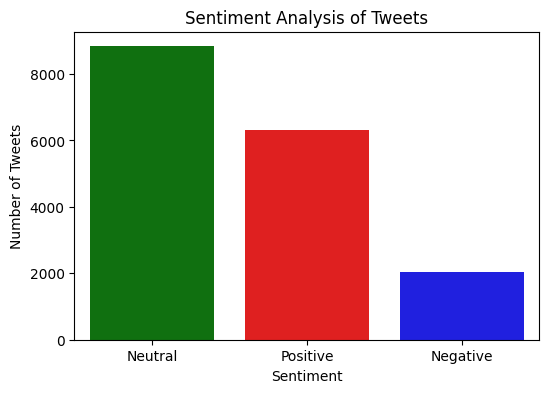

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment categories
sentiment_counts = df["Sentiment"].value_counts()

# Plot the results
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "blue"])
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


* This bar chart visualizes the distribution of sentiments from the tweet dataset.
* This counts the number of tweets classified as Positive, Negative, and Neutral.
  * X-axis → Represents the Sentiment Categories (Positive, Negative, Neutral).
  * Y-axis → Represents the Number of Tweets in each sentiment category.
* Colors:
  * 🟢 Green → Neutral
  * 🔴 Red → Positive
  * 🔵 Blue → Negative
  
**Graph Interpretation**
* Neutral Sentiments (Green) → The majority of tweets (about 8,000+ tweets).
* Positive Sentiments (Red) → Around 6,000+ tweets.
* Negative Sentiments (Blue) → The least frequent sentiment with roughly 2,000 tweets.


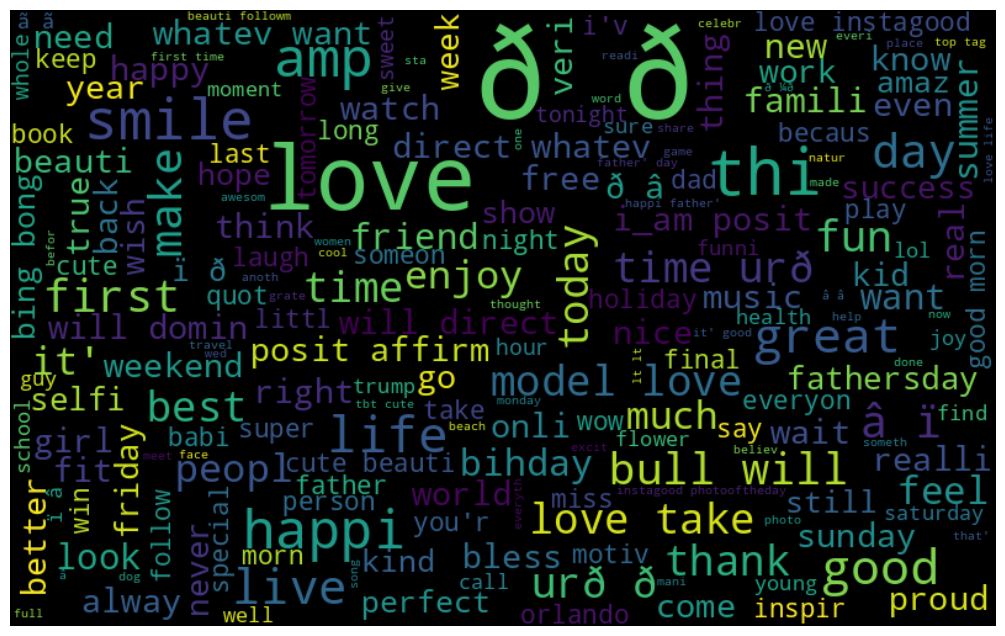

In [ ]:
# frequent words visualization for positive words.
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']=='Positive']])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


* This line extracts all tweets that were classified as Positive.
* It combines them into a single large text string, making it easier to analyze word frequency.
* WordCloud() generates a visual representation of the most frequent words in positive tweets.
* The size of the words corresponds to their frequency (larger words appear more often).
* Displays the word cloud, turning off the axis for a cleaner look.

**Interpreting the Word Cloud**

* Most Frequent Words: Words like "love," "happy," "great," "best," "enjoy," "smile," and "fun" are larger, indicating they appear frequently in positive tweets.
* Positive Themes: The presence of words like "success," "life," "thank," "weekend," "birthday," and "friends" suggests an overall optimistic and joyful sentiment in the tweets.
* Emoji Characters & Symbols: Some unreadable symbols (e.g., "ð" or "â") may have resulted from encoding issues in the dataset.


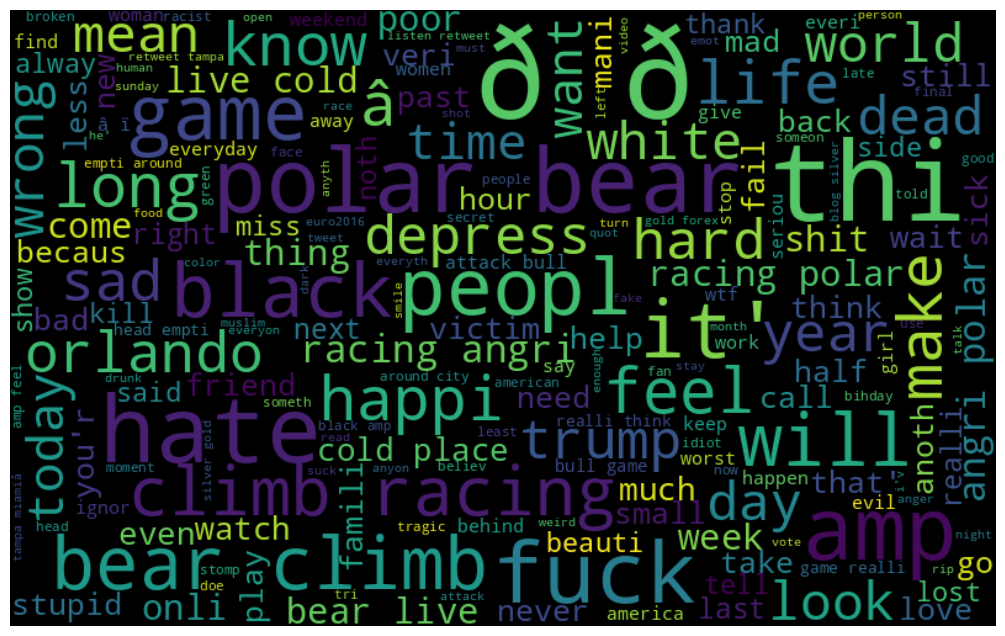

In [ ]:
# frequent words visualization for negative words.
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']=='Negative']])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


* Extracts all negative tweets from the dataset.
* Combines them into a single string to analyze word frequency.
* Generates a word cloud where larger words appear more frequently.
* Displays the word cloud without axis labels for a clean view.

**Interpreting the Word Cloud**

* Most Frequent Words: Words like "hate," "depress," "sad," "angry," "fail," "dead," "hard," "wrong," and "kill" dominate, indicating strong negative emotions.
* Themes in Negative Tweets:
  * The presence of words like "trump," "orlando," "black," "white," "racist," and "victim" may suggest political or social issues.
  * Words like "fail," "poor," "cold," "dead," "stupid," "wrong," and "hard" indicate frustration and negativity.
* Repeated Words like "polar," "bear," and "climb":
  * May be due to specific events or trending topics in the dataset.
  * Could be related to news discussions or sarcasm in tweets.



In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags=[]
    # loop over the words in the tweet
    for i in tweets:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

* Initializes an empty list hashtags to store extracted hashtags.
* Iterates through each tweet in the dataset.
* Uses Regular Expressions (re.findall):
  * #(\w+) → Extracts words that start with # and contain letters, numbers, or underscores.
* Adds the extracted hashtags to the hashtags list.
* Extracts hashtags from cleaned tweets.
* Stores them in a new column "hashtags".


In [ ]:
# extract the hashtags from non-racist/sexist tweets
ht_positive=hashtag_extract(df['clean_tweet'][df['Sentiment']=='Positive'])

# extract the hashtags from racist/sexist tweets
ht_negative=hashtag_extract(df['clean_tweet'][df['Sentiment']=='Negative'])

* This step aims to analyze hashtags separately for positive and negative tweets to identify trends and sentiment-driven hashtag usage.
* Calls hashtag_extract() on tweets labeled "Positive" and "Negative".
* Stores extracted positive sentiment hashtags in ht_positive.
* Stores extracted negative sentiment hashtags in ht_negative.

In [ ]:
ht_positive[:5]

[['acne', 'altwaystoh', 'healthi', 'healing'],
 ['bihday', 'nephew'],
 ['deep', 'inthefeel'],
 ['lifestyl'],
 ['lemans24', 'teamaudi']]

The code ht_positive[:5] will display the first five extracted hashtag lists from positive tweets.

In [ ]:
#unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

* After extracting hashtags, they are stored as a list of lists (each inner list corresponds to a tweet).
* To flatten this structure into a single list of hashtags, we use the sum() function.

* sum(ht_positive, []):
  * Takes ht_positive, which is a list of lists.
  * Merges (flattens) all inner lists into a single list.
  * The empty list ([]) acts as a starting point for concatenation.
* The same operation is performed for ht_negative.


In [ ]:
ht_positive[:5]

['acne', 'altwaystoh', 'healthi', 'healing', 'bihday']

The code ht_positive[:5] will display the first five extracted hashtag lists from positive tweets.


In [ ]:
#for positive tweets
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,acne,7
1,altwaystoh,48
2,healthi,107
3,healing,18
4,bihday,53


* This step determines the most common hashtags used in positive tweets.
* Uses nltk.FreqDist() to count occurrences of each hashtag in ht_positive.
* Creates a DataFrame (d) with:
  * "Hashtag": Unique hashtags.
  * "Count": Frequency of each hashtag.
* Displays the top 5 most common hashtags.

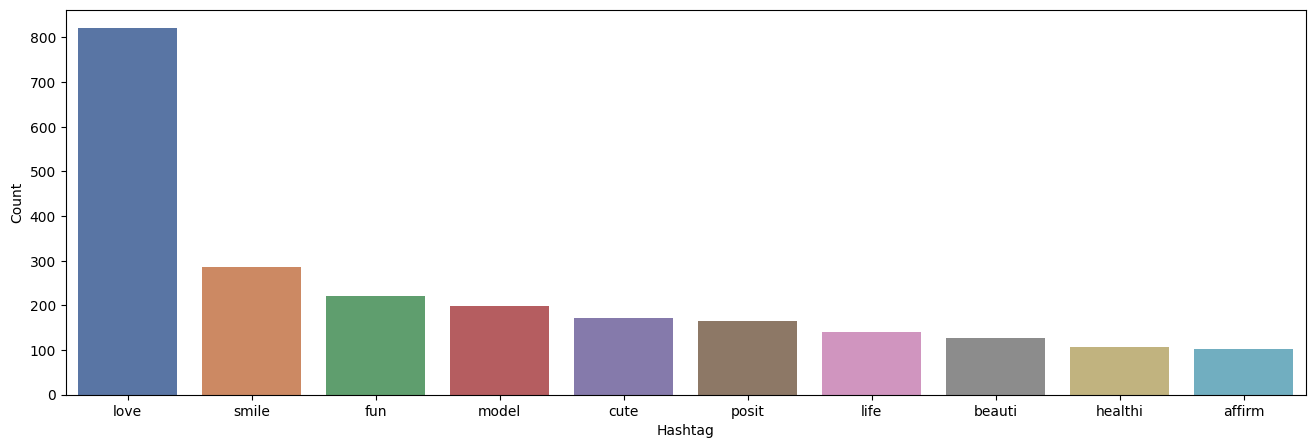

In [ ]:
#select the top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
sns.barplot(data=d,x='Hashtag',y='Count',palette='deep')
plt.show()

* This bar chart shows the most frequently used positive hashtags in tweets.
* Selects the top 10 hashtags based on their frequency.
* Creates a bar chart where:
  * X-axis: Hashtags
  * Y-axis: Count (frequency of occurrence)
  * Palette "deep": Uses distinct colors for clarity.

**Insights from the Chart**
* "love" is the most used hashtag, appearing over 800 times.
* Other frequent hashtags include "smile," "fun," "model," "cute," and "posit" (possibly "positive").
* This suggests that positive tweets often emphasize happiness, beauty, and affirmation.



In [ ]:
#for negative tweets
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,allgoingwel,1
1,guncontrolpleas,1
2,senselessshoot,1
3,takethegun,1
4,comicrelief,1


* FreqDist from NLTK (Natural Language Toolkit) counts the frequency of each hashtag in the negative tweets.
* Converts the frequency data into a pandas DataFrame, where:
  * "Hashtag" column contains unique hashtags.
  * "Count" column represents how many times each hashtag appears.
* Later, displays the first few rows of the DataFrame.

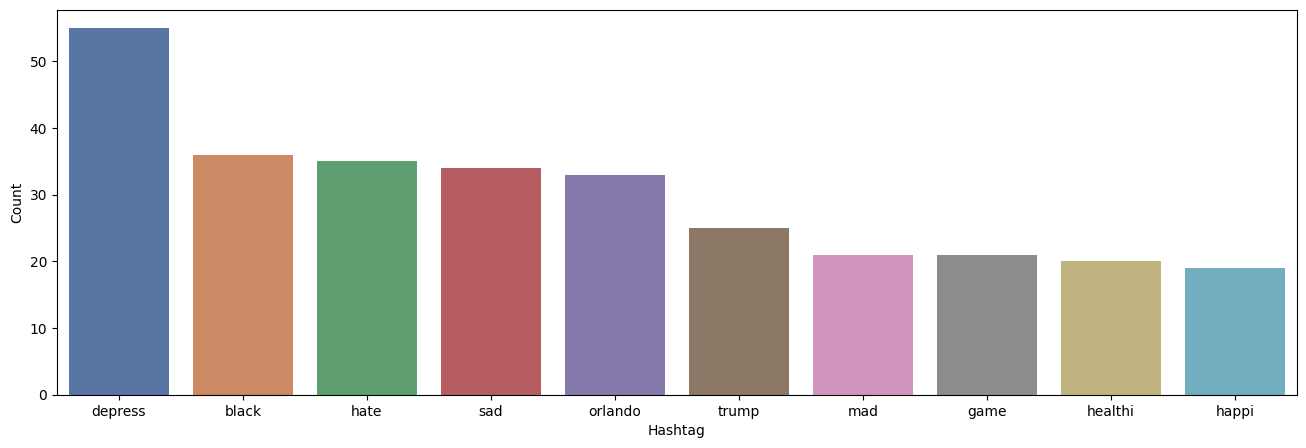

In [ ]:
#select the top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
sns.barplot(data=d,x='Hashtag',y='Count',palette='deep')
plt.show()

* This bar chart visualizes the top 10 most frequently used hashtags in negative tweets.
* Here’s what it shows:

**Key Observations:**
* "#depress" is the most common hashtag, appearing more than 50 times.
* "#black", "#hate", and "#sad" are also frequently used, indicating emotional or social issues.
* "#orlando" and "#trump" suggest that some tweets might be related to political or social events.
* Other hashtags like "#mad", "#game", "#healthi", and "#happi" may have different contextual meanings, possibly ironic or sarcastic.

### **Input Split**

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

* This code snippet performs Bag-of-Words(BoW) feature extraction on the cleaned tweets.

**Using CountVectorizer:**

* Converts text data into a matrix of token (word) counts.
* Each row represents a tweet, and each column represents a word.

**Key Parameters Explained:**

* max_df=0.90: Ignores words that appear in more than 90% of the tweets (common words).
* min_df=2: Ignores words that appear in fewer than 2 tweets (rare words).
* max_features=1000: Keeps only the top 1000 most frequent words.
* stop_words='english': Removes common English stop words (e.g., "the", "is", "and").

**fit_transform(df['clean_tweet']):**

  * Learns the vocabulary from the tweets.
  * Transforms tweets into a sparse matrix of word frequencies.

In [ ]:
#bow[0].toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['Sentiment'],random_state=42,test_size=0.25)

* This code splits the dataset into training and testing sets for machine learning model training.

**Using train_test_split from sklearn.model_selection:**

* Splits the BoW feature matrix (bow) into training (x_train) and testing (x_test) sets.
* Splits the target variable (df['Sentiment']) into training (y_train) and testing (y_test) sets.

**Parameters Explained:**

* test_size=0.25: Reserves 25% of the data for testing, leaving 75% for training.
* random_state=42: Ensures reproducibility (same split every time).

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

* Importing necessary tools for training and evaluating a logistic regression model.

In [ ]:
#training
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In the above step, Logistic Regression model is now trained on the training dataset (x_train, y_train).

In [ ]:
#testing
pred=model.predict(x_test)
f1=f1_score(y_test,pred,average='weighted')
print(f1)

0.8621186239740587


The model has made predictions on the test set, and you have computed the F1 score using weighted averaging. The F1 score balances precision and recall, making it a good metric for imbalanced datasets.

In [ ]:
accuracy_score(y_test,pred)

0.866046511627907

The above step provides the proportion of correctly classified tweets out of all test samples.

In [ ]:
# use probability to get the output
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1] >= 0.3
pred=pred.astype(int)
# Convert predictions back to original labels instead of 0 and 1
pred = ["Positive" if p else "Negative" for p in pred]
f1=f1_score(y_test,pred,average='weighted')
print(f1)

0.09019038326303157


**Predicting Probabilities:**
* Instead of directly predicting "Positive" or "Negative," the model gives a probability score for each tweet.

**Setting a Threshold (0.3):**

* If the probability is 30% or higher (≥ 0.3), we classify the tweet as "Positive".
* If it's less than 30% (< 0.3), we classify it as "Negative".

**Converting Predictions:**

* The predictions (0s and 1s) are converted to actual labels ("Positive" or "Negative").

**F1 Score Calculation:**

* The F1 score is calculated to measure how well the model is performing.
* It balances both precision (how many predicted positives are actually positive) and recall (how many actual positives are correctly predicted).

**Final Output:**

* The print(f1) command shows the F1 score, which tells us the model’s overall effectiveness in classifying tweets.

In [ ]:
accuracy_score(y_test,pred)

0.15

* The accuracy_score(y_test, pred) function calculates the proportion of correctly predicted tweets out of all tweets in the test set.
* It tells us how well the model is classifying positive and negative tweets.
* Compares the predicted labels (pred) with the actual labels (y_test).
* Returns a value between 0 and 1, where:
  * 1 (or 100%) means perfect predictions.
  * 0 (or 0%) means all predictions are wrong.


In [ ]:
pred_prob[0][1]>=0.3

True

* The expression pred_prob[0][1] >= 0.3 checks whether the predicted probability of the first test tweet belonging to the positive sentiment class is greater than or equal to 0.3.

**Detailed Explaination:**
* pred_prob[0][1]: This extracts the probability that the first tweet is classified as positive.
* >= 0.3: This sets a threshold of 30% confidence. If the probability is at least 0.3, the tweet is classified as positive; otherwise, it's negative.

## *END*